# Matplotlib库
---
<img src="https://matplotlib.org/stable/_static/logo2.svg" style="width: 20%;"/>

可视化是研究和展示计算结果的通用工具。几乎所有的计算结果（不管是数值计算还是符号计算）的最终产物都是某种类型的图形。当使用图形进行可视化时，最容易挖掘出计算结果中的信息。

* Matplotlib是Python的绘图库，它能让使用者很轻松地将数据图形化，并且提供多样化的输出格式。
* Matplotlib可以用来绘制各种静态，动态，交互式的图表。
* Matplotlib可以绘制线图、散点图、等高线图、条形图、柱状图、3D 图形、甚至是图形动画等等。

## 参考资料
[MatplotLib展示](https://matplotlib.org/stable/gallery/index.html)

## 导入模块
---

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

IPython的魔法命令`%matplotlib inline`用于配置matplotlib使用inline后端，这可以让生成的图形直接在Jupyter终端显示。如果需要显示交互式动态数据，则需要使用魔法命令`%matplotlib widget`指定ipympl后端。

## 入门
---

matplotlib中的图形是由一个Figure（画布）实例和若干个Axes（轴）实例构建而成。如果要在一个画布中显示多个数据面板或者在另一个Axes实例中显示子图，可以手动将Axes实例分配到画布的任意区域，或者使用matplotlib的布局管理器将Axes实例自动添加到画布。

Axes实例提供了一个可以用于绘制不同样式图形的坐标系，包括线图、散点图、柱状图等。另外Axes实例可以用来决定如何显示坐标轴，例如轴标签、刻度线、刻度线标签等。事实上matplotlib中用于设置图形外观的大部分函数都是Axes类的方法。

In [2]:
x = np.linspace(-5, 2, 100)
y1 = x**3 + 5*x**2 + 10
y2 = 3*x**2 + 10*x
y3 = 6*x + 10

我们将为函数$y(x)=x^3+5x^2+10$及其一阶和二阶导数绘制图形。

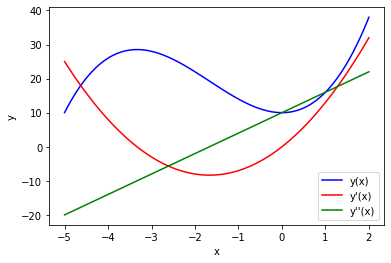

In [3]:
fig, ax = plt.subplots()

ax.plot(x, y1, color="blue", label="y(x)")
ax.plot(x, y2, color="red", label="y'(x)")
ax.plot(x, y3, color="green", label="y''(x)")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend(loc='lower right')

这里我们使用`plt.subplots`函数快捷创建Figure和Axes实例。Axes实例创建之后，后续所有的步骤都是通过调用Axes实例中的方法完成的。

`ax.plot`函数的第一个参数和第二个参数为图形中x值和y值的NumPy数组，它将绘制一条连接这些点的线。本例中，我们使用label参数为每条线设置了文本标签，使用ax.set_xlabel和ax.set_ylabel设置轴标签，使用ax.legend方法设置了图例的位置。

为了满足出版或生产标准，我们可能需要更改各类标签和图例的字体字号，移动图例的位置，更改轴刻度线的数量，添加注释和额外的辅助线等。经过上述调整，我们可以得到更美观的图形。

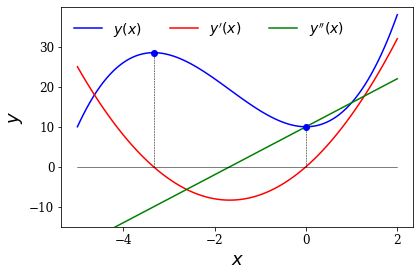

In [4]:
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.size"] = "12"

fig, ax = plt.subplots()

ax.plot(x, y1, lw=1.5, color="blue", label=r"$y(x)$")
ax.plot(x, y2, lw=1.5, color="red", label=r"$y'(x)$")
ax.plot(x, y3, lw=1.5, color="green", label=r"$y''(x)$")

ax.plot(x, np.zeros_like(x), lw=0.5, color="black")
ax.plot([-3.33, -3.33], [0, (-3.3)**3 + 5*(-3.3)**2 + 10], ls='--', lw=0.5, color="black")
ax.plot([0, 0], [0, 10], lw=0.5, ls='--', color="black")
ax.plot([0], [10], lw=0.5, marker='o', color="blue")
ax.plot([-3.33], [(-3.3)**3 + 5*(-3.3)**2 + 10], lw=0.5, marker='o', color="blue")

ax.set_ylim(-15, 40)
ax.set_yticks([-10, 0, 10, 20, 30])
ax.set_xticks([-4, -2, 0, 2])

ax.set_xlabel("$x$", fontsize=18)
ax.set_ylabel("$y$", fontsize=18)
ax.legend(loc=0, ncol=3, fontsize=14, frameon=False)

fig.tight_layout();

### 交互式模式

matplotlib后端支持各种widget图形工具包（Qt、GTK、wxWidgets等）。在交互式模式中，用户可以缩放和平移获得的图形。我们后续也会使用交互式模式展示动态数据。

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
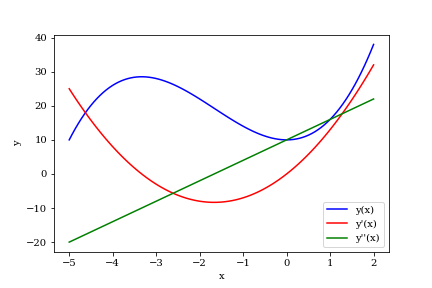

In [5]:
%matplotlib widget
fig, ax = plt.subplots()

ax.plot(x, y1, color="blue", label="y(x)")
ax.plot(x, y2, color="red", label="y'(x)")
ax.plot(x, y3, color="green", label="y''(x)")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend(loc='lower right')

重新指定inline后端，退出交互式模式。

In [6]:
%matplotlib inline

## Figure 对象
---

除了提供提供Axes实例的画布外，Figure对象还提供了进行图形操作的方法，以及用于设置图形外观的多个属性。

在matplotlib中，使用`plt.figure`函数来创建Figure对象。该函数的[可选关键词参数](https://matplotlib.org/stable/api/figure_api.html)用于设置图形属性。figsize关键词参数以元组的形式设置图形画布的宽和高（单位是英寸）。facecolor关键词参数设置图形画布的颜色。

创建Figure对象后，可以使用`add_axes`方法来创建新的Axes实例并复制到图形画布的某个区域。add_axes方法有一个必须的参数，包含左下角坐标以及Axes对象宽高的列表，格式是(left, bottom, width, height)。Axes坐标使用比例表示，例如(0, 0, 1, 1)会完全填满画布，不会留下空间给轴标签和刻度。`add_axes`方法也有各类关键词参数，例如facecolor关键词参数可以设置Axes实例区域的颜色。

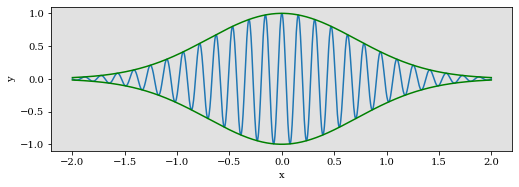

In [7]:
fig = plt.figure(figsize=(8, 2.5))

# axes coordinates as fractions of the canvas width and height
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes((left, bottom, width, height), facecolor="#e1e1e1")

x = np.linspace(-2, 2, 1000)
y1 = np.cos(40 * x)
y2 = np.exp(-x**2)

ax.plot(x, y1 * y2)
ax.plot(x, y2, 'g')
ax.plot(x, -y2, 'g')
ax.set_xlabel("x")
ax.set_ylabel("y")

# save as file
fig.savefig("graph.png", dpi=100) 
fig.savefig("graph.pdf", dpi=300, facecolor="#f1f1f1")

上述使用figsize=(8, 2.5)和dpi=100生成的图形大小是800像素×600像素。

fig.savefig中指定的颜色会替代plt.figure中指定的背景色。参数transparent=True可以将图形画布设置为透明。注意jpg格式的图片不支持透明色。

In [35]:
!rm graph.png graph.pdf

## Axes实例
---

Axes实例是matplotlib库进行绘图的核心。区别于`add_axes`方法显示地将Axes实例添加到图形中，matplotlib提供了多种布局管理器。最常用的布局管理器是[plt.subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html#matplotlib.pyplot.subplots)函数，通过设置改函数的第一个参数nrows和第二个参数cols，可以根据给定的行数和列数创建Axes对象网络。

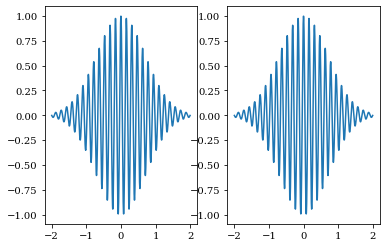

In [8]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)

axes[0].plot(x, y1 * y2)
axes[1].plot(x, y1 * y2)

这里`plt.subplots`函数会返回一个元组(fig, axes)，fig是一个Figure实例，axes是一个大小为(nrows, cols)的NumPy数组。此外，可以通过sharex和sharey参数指定共享x和y轴的列和/或行。

In [9]:
axes

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

需要注意区分`plt.subplots`函数和`plt.subplot`函数。后者的输入参数是网格布局和实例序号，只返回一个Axes。

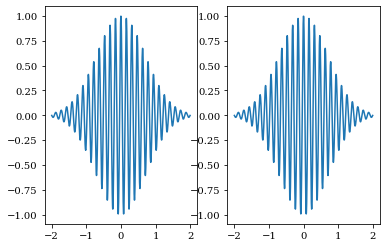

In [10]:
# 上述plt.subplots代码等价于如下plt.subplot代码
ax1 = plt.subplot(1, 2, 1)
ax1.plot(x, y1 * y2)
ax2 = plt.subplot(1, 2, 2)
ax2.plot(x, y1 * y2)

### 绘图类型

有效的科学和技术数据的可视化需要使用各种绘图技术。matplotlib在Axes实例的方法中提供了不同种类的[绘图方法](https://matplotlib.org/stable/plot_types/index.html)。

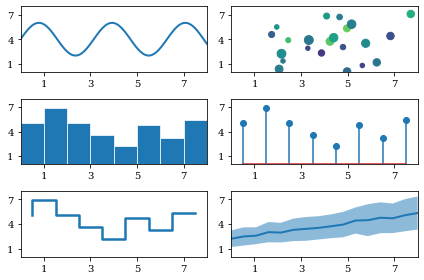

In [11]:
fig, axes = plt.subplots(nrows = 3, ncols = 2)

# 第一组 折线图
x = np.linspace(0, 10, 100)
y = 4 + 2 * np.sin(2 * x)
axes[0,0].plot(x, y, linewidth=2.0)

# 第二组 散点图
x = 4 + np.random.normal(0, 2, 24)
y = 4 + np.random.normal(0, 2, len(x))
sizes = np.random.uniform(15, 80, len(x))
colors = np.random.uniform(15, 80, len(x))
axes[0,1].scatter(x, y, s=sizes, c=colors, vmin=0, vmax=100)

# 第三组 条形图
x = 0.5 + np.arange(8)
y = np.random.uniform(2, 7, len(x))
axes[1,0].bar(x, y, width=1, edgecolor="white", linewidth=0.7)

# 第四组 针形图
axes[1,1].stem(x, y)

# 第五组 阶梯图
axes[2,0].step(x, y, linewidth=2.5)

# 第六组 填充图
x = np.linspace(0, 8, 16)
y1 = 3 + 4*x/8 + np.random.uniform(0.0, 0.5, len(x))
y2 = 1 + 2*x/8 + np.random.uniform(0.0, 0.5, len(x))
axes[2,1].fill_between(x, y1, y2, alpha=.5, linewidth=0)
axes[2,1].plot(x, (y1 + y2)/2, linewidth=2)

for ax in axes.flat:  # 遍历多维数组axes中的所有元素
    ax.set(xlim=(0, 8), xticks=np.arange(1, 8, 2),
           ylim=(0, 8), yticks=np.arange(1, 8, 3))

plt.tight_layout()

我们可以使用Python的help函数查询每个绘图方式的使用说明。

In [12]:
help(plt.Axes.bar)

Help on function bar in module matplotlib.axes._axes:

bar(self, x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
    Make a bar plot.
    
    The bars are positioned at *x* with the given *align*\ment. Their
    dimensions are given by *height* and *width*. The vertical baseline
    is *bottom* (default 0).
    
    Many parameters can take either a single value applying to all bars
    or a sequence of values, one for each bar.
    
    Parameters
    ----------
    x : float or array-like
        The x coordinates of the bars. See also *align* for the
        alignment of the bars to the coordinates.
    
    height : float or array-like
        The height(s) of the bars.
    
    width : float or array-like, default: 0.8
        The width(s) of the bars.
    
    bottom : float or array-like, default: 0
        The y coordinate(s) of the bars bases.
    
    align : {'center', 'edge'}, default: 'center'
        Alignment of the bars to the *x* coordinates

### 线条属性

matplotlib绘图方法中线条的基本属性和对应关键词参数

| 关键词参数 | 可选值 | 说明 |
|---|---|---|
| color | 颜色字符串，如red、blue等，或者形如#aabbcc的RGB颜色码 | [设置颜色](https://matplotlib.org/stable/tutorials/colors/colors.html) |
| alpha | 介于0.0（完全透明）和1.0（完全不透明）之间的浮点数  | 设置透明度 |
| linewidth 和 lw | 浮点数，单位为像素 | 设置线宽 |
| linestyle 和 ls | -实线 --虚线 :点线 -.点画线 | [设置线型](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html) |
| marker | +十字形 o圆形 *星形 s方形 1,2,3等表示不同角度三角形 | [设置数据点符号标记](https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html) |
| markersize | 浮点数 | 设置标记大小 |
| markerfacecolor | 颜色值，同color | 设置标记颜色 |
| markeredgewidth | 浮点数，单位为像素 | 设置标记边缘线宽 |
| markeredgecolor | 颜色值，同color | 设置标记边缘颜色 |

在实际应用中，不同颜色、宽度和线型的线条是提高图形可读性的重要工具。线宽可用于强调线条的重要性。下面的示例绘制了函数$sin(x)$及其在$x=0$处级数展开后的图形。

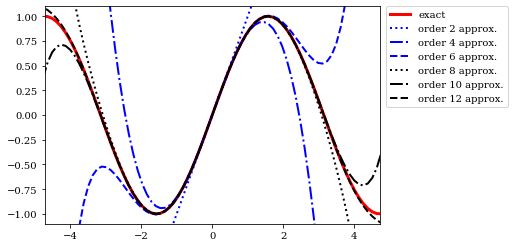

In [13]:
import sympy

sym_x = sympy.Symbol("x")
x = np.linspace(-2 * np.pi, 2 * np.pi, 100)

def sin_expansion(x, n):
    func = sympy.lambdify(sym_x, sympy.sin(sym_x).series(n=n+1).removeO(), 'numpy')
    return func(x)

fig, ax = plt.subplots()
ax.plot(x, np.sin(x), lw=3, c='r', label='exact')

colors = ["blue", "black"]
linestyle = [':', '-.', '--']

for idx, n in enumerate(range(1, 12, 2)):  # 可遍历的数据对象组合为一个索引序列
    ax.plot(x, sin_expansion(x, n), color=colors[idx//3], linestyle=linestyle[idx%3],
           linewidth=2, label="order %d approx." % (n+1))

ax.set_ylim(-1.1, 1.1)
ax.set_xlim(-1.5*np.pi, 1.5*np.pi)
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.0)

### 图例

Axes实例的[legend方法](https://matplotlib.org/stable/api/legend_api.html?highlight=legend#)可以将图例添加到matplotlib图形中。图例中只包含添加了标签的线条（Axes.plot label参数给线条添加标签）。

我们使用loc参数控制图例的位置：loc=1表示右上角，loc=2便是左上角，loc=3表示左下角，loc=4表示右下角。

我们还可以使用bbox_to_ancher参数将图里放置到图形画布的任意位置。bbox_to_ancher参数的值是(x,y)形式的元组，数值使用比例表示。

### 文本格式和注释

文本标签、标题和注释是大部分图形的重要组成部分，对它们的格式进行完全控制是生成出版品质图形的基本要求。

| 关键词参数 | 说明 |
|---|---|
| fontsize | 字号（以磅为单位） |
| family/fontname | 字体） |
| backgroudcolor | 背景色 |
| color | 文本颜色 |
| alpha | 透明度 |
| rotation | 文本标签的旋转角度 |

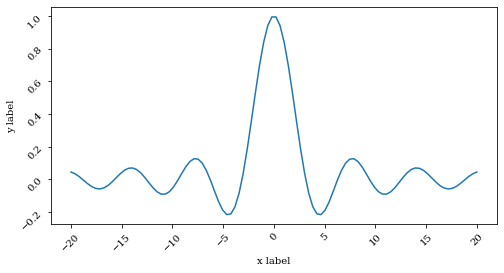

In [14]:
fig, ax = plt.subplots(figsize=(8, 4))

x = np.linspace(-20, 20, 100)
y = np.sin(x) / x

ax.plot(x, y)

ax.set_ylabel("y label")
ax.set_xlabel("x label")

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_rotation(45)

在可视化科学计算时，在文本标签中正确渲染数学符号非常重要。matplotlib在文本标签中使用LaTex标记来支持数学符号的显示。数学符号需要放在一对`$`号之间，例如`$f(x)=x^2$`显示为$f(x)=x^2$。

在matplotlib中嵌入LaTex代码有一个常见问题。Python使用`\`字符作为转义符，但是Latex中`\`字符表示命令的开始。为了防止Python解释器对LaTex表达式的字符串进行转义，需要在字符串表达式前加上前缀`r`。

Text(2, 0.1, 'Equation: $i\\hbar \\frac{\\partial}{\\partial t}\\Psi = \\hat{H}\\Psi$')

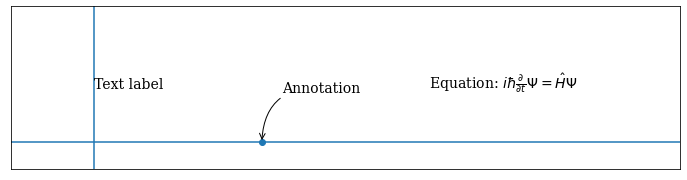

In [15]:
fig, ax = plt.subplots(figsize=(12, 3))

ax.set_yticks([])
ax.set_xticks([])
ax.set_xlim(-0.5, 3.5)
ax.set_ylim(-0.05, 0.25)
ax.axhline(0) # 水平参考线
ax.axvline(0) # 垂直参考线

ax.text(0, 0.1, "Text label", fontsize=14, family="serif")  # 文字标签

ax.plot(1, 0, 'o')
ax.annotate("Annotation",  # 注释
            fontsize=14, family="serif",
            xy=(1, 0), xycoords='data',
            xytext=(+20, +50), textcoords='offset points', 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=.5"))

ax.text(2, 0.1, r"Equation: $i\hbar \frac{\partial}{\partial t}\Psi = \hat{H}\Psi$", fontsize=14, family="serif")

### 轴属性

二维图形有两个轴对象，水平x轴和垂直y轴。每个轴都可以设置各自的属性，包括轴标签、刻度位置、刻度标签、轴自身的位置和外观等。

#### 轴标签和标题

Axis实例的set_xlabel和set_ylabel方法可以设置轴标签。这两个函数可以接受其他参数用于设置文本属性。可选参数labelpad可以设置轴与标签之间的距离（以磅为单位）。set_title方法的loc参数可以赋值为'left'、'centered'、'right'，用于设置标题的对齐方式。

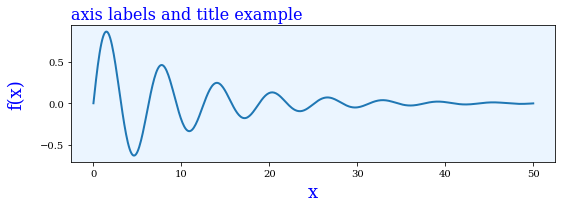

In [16]:
fig, ax = plt.subplots(figsize=(8, 3), subplot_kw={'facecolor': "#ebf5ff"})

x = np.linspace(0, 50, 500)
y = np.sin(x) * np.exp(-x/10)
ax.plot(x, y, lw=2)

ax.set_xlabel("x", labelpad=5,
              fontsize=18, fontname='serif', color="blue")
ax.set_ylabel("f(x)", labelpad=15,
              fontsize=18, fontname='serif', color="blue")
ax.set_title("axis labels and title example", loc='left',
             fontsize=16, fontname='serif', color="blue")

fig.tight_layout()  #  tight_layout会自动调整子图参数,使之填充整个图像区域

#### 轴的范围

默认情况下，matplotlib的x轴和y轴范围是根据Axes对象绘制的数据自动调整的。Axes对象的set_xlim和set_ylim方法可以设置轴上显示的上线和下限。Axes对象的axis方法接受'tight'、'equal'等字符串作为参数，前者表示坐标的范围紧密匹配绘制的线条，后者表示每个坐标轴单位长度包含相同的像素点（坐标比例相同）。

Text(0.5, 1.0, "axis('equal')")

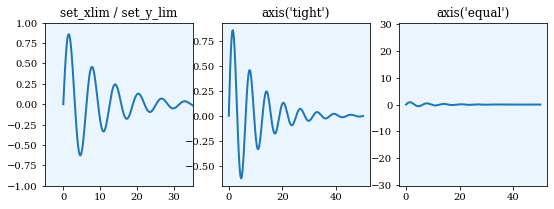

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3), subplot_kw={'facecolor': "#ebf5ff"})

axes[0].plot(x, y, lw=2)
axes[0].set_xlim(-5, 35)
axes[0].set_ylim(-1, 1)
axes[0].set_title("set_xlim / set_y_lim")

axes[1].plot(x, y, lw=2)
axes[1].axis('tight')
axes[1].set_title("axis('tight')")

axes[2].plot(x, y, lw=2)
axes[2].axis('equal')
axes[2].set_title("axis('equal')")

#### 轴的刻度线、刻度标签

matplotlib把刻度分为主要刻度（majot tick）和次要刻度（minor tick）。

如果要改变刻度的摆放方式，可以使用Axes.xaxis和Axes.yaxis中的set_major_locator和set_minor_locator方法。

如果需要明确指定刻度的位置，可以使用set_xticks和set_yticks方法，这两个方法根据坐标列表确定主刻度的位置。

如果要在刻度位置显示特定字符串，可以使用set_xticklabels和set_yticklabels方法。

Text(0.5, 1.0, 'set_xticklabels')

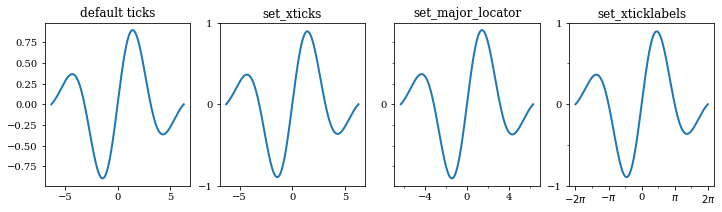

In [18]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 500)
y = np.sin(x) * np.exp(-x**2/20)

fig, axes = plt.subplots(1, 4, figsize=(12, 3))

axes[0].plot(x, y, lw=2)
axes[0].set_title("default ticks")

axes[1].plot(x, y, lw=2)
axes[1].set_yticks([-1, 0, 1])
axes[1].set_xticks([-5, 0, 5])
axes[1].set_title("set_xticks")

axes[2].plot(x, y, lw=2)
axes[2].xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))  # 最大间隔数目，比最大刻度线的数目少1。
axes[2].yaxis.set_major_locator(mpl.ticker.FixedLocator([-1, 0, 1]))  # 固定刻度线位置
axes[2].xaxis.set_minor_locator(mpl.ticker.MaxNLocator(8))
axes[2].yaxis.set_minor_locator(mpl.ticker.MaxNLocator(8))
axes[2].set_title("set_major_locator")

axes[3].plot(x, y, lw=2)
axes[3].set_yticks([-1, 0, 1])
axes[3].set_xticks([-2 * np.pi, -np.pi, 0, np.pi, 2 * np.pi])
axes[3].set_xticklabels(['$-2\pi$', '$-\pi$', 0, r'$\pi$', r'$2\pi$'])
axes[3].xaxis.set_minor_locator(mpl.ticker.FixedLocator([-3 * np.pi / 2, -np.pi/2, 0, np.pi/2, 3 * np.pi/2]))
axes[3].yaxis.set_minor_locator(mpl.ticker.MaxNLocator(4))
axes[3].set_title("set_xticklabels")

#### 网格线

网格线有助于从图形中直观地读取数值。Axis对象的gird方法可以启用网格线。如果需要给网格线设置不同的格式，可以多次调用grid方法。

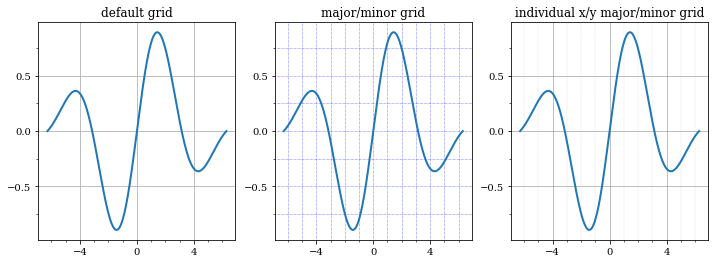

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

x_major_ticker = mpl.ticker.MultipleLocator(4)
x_minor_ticker = mpl.ticker.MultipleLocator(1)
y_major_ticker = mpl.ticker.MultipleLocator(0.5)
y_minor_ticker = mpl.ticker.MultipleLocator(0.25)

for ax in axes:
    ax.plot(x, y, lw=2)
    ax.xaxis.set_major_locator(x_major_ticker)
    ax.yaxis.set_major_locator(y_major_ticker)
    ax.xaxis.set_minor_locator(x_minor_ticker)
    ax.yaxis.set_minor_locator(y_minor_ticker)

axes[0].set_title("default grid")
axes[0].grid()  # 次要刻度对应的网格线默认不显示

axes[1].set_title("major/minor grid")
axes[1].grid(color="blue", which="both", linestyle=':', linewidth=0.5)

axes[2].set_title("individual x/y major/minor grid")
axes[2].grid(color="grey", which="major", axis='x', linestyle='-', linewidth=0.5)
axes[2].grid(color="grey", which="minor", axis='x', linestyle=':', linewidth=0.25)
axes[2].grid(color="grey", which="major", axis='y', linestyle='-', linewidth=0.5)

#### 对数坐标

对跨越多个数量级的数据进行可视化时，需要使用对数坐标。在matplotlib中，loglog、semilogx和semilogy分别对应x轴和y轴同时、只有x轴、只有y轴使用对数坐标。另外一种方法是使用set_xscale和set_yscale方法，将`log`作为第一个参数，将数轴分布设置为对数坐标。

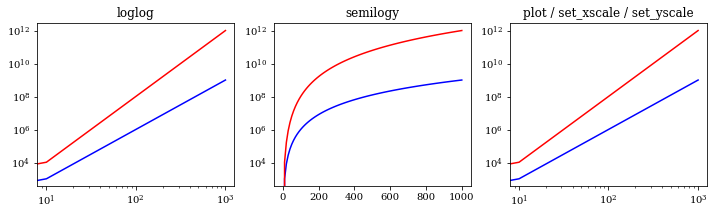

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

x = np.linspace(0, 1e3, 100)
y1, y2 = x**3, x**4

axes[0].set_title('loglog')
axes[0].loglog(x, y1, 'b', x, y2, 'r')

axes[1].set_title('semilogy')
axes[1].semilogy(x, y1, 'b', x, y2, 'r')

axes[2].set_title('plot / set_xscale / set_yscale')
axes[2].plot(x, y1, 'b', x, y2, 'r')
axes[2].set_xscale('log')  # 可选关键词{"linear", "log", "symlog", "logit"}
axes[2].set_yscale('log')

#### 双轴图

利用双轴可以显示彼此重叠的两个独立Axes实例。这里我们使用twinx方法（还有twiny方法）生成第二个Axes实例，该实例与第一个实例共享x轴，但y轴是独立的，并显示在图形的右侧。

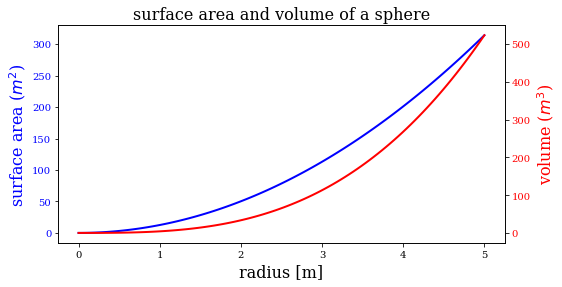

In [21]:
fig, ax1 = plt.subplots(figsize=(8, 4))

r = np.linspace(0, 5, 100)
a = 4 * np.pi * r ** 2  # area
v = (4 * np.pi / 3) * r ** 3  # volume


ax1.set_title("surface area and volume of a sphere", fontsize=16)
ax1.set_xlabel("radius [m]", fontsize=16)

ax1.plot(r, a, lw=2, color="blue")
ax1.set_ylabel(r"surface area ($m^2$)", fontsize=16, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()  # 共享x轴
ax2.plot(r, v, lw=2, color="red")
ax2.set_ylabel(r"volume ($m^3$)", fontsize=16, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")


#### 边框线

上述所有图形都有一条包围Axes区域的边框。可以使用`Axes.spines`改变构成外围框的线的属性。spines属性是一个字典，里面包含right、left、top、bottom四个键。可以使用set_color方法将不需要显示的边框线的颜色设置为None。同时，我们还需要使用Axes.xaxis和Axes.xaxis的set_ticks_position方法删除与边框线相关的刻度线。

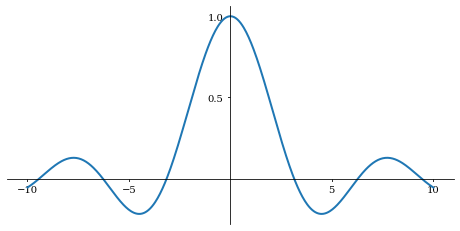

In [22]:
x = np.linspace(-10, 10, 500)
y = np.sin(x) / x

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(x, y, linewidth=2)

# remove top and right spines
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# remove top and right spine ticks
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# move bottom and left spine to x = 0 and y = 0
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

ax.set_xticks([-10, -5, 5, 10])
ax.set_yticks([0.5, 1])

# give each label a solid background of white, to not overlap with the plot line
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_bbox({'facecolor': 'white',
                    'edgecolor': 'white'})

## Axes高级布局
---


### 图中图

图中图（inset）常用于显示大图形中某个特别感兴趣的区域的放大图。在matplotlib中，可以使用Figure.add_axes方法在图形画布的任意位置放置其他Axes对象，即时它们与现在的Axes对象重叠。为图中图创建对象时，使用参数facecolor='none'将背景色设为透明可能会很有用。

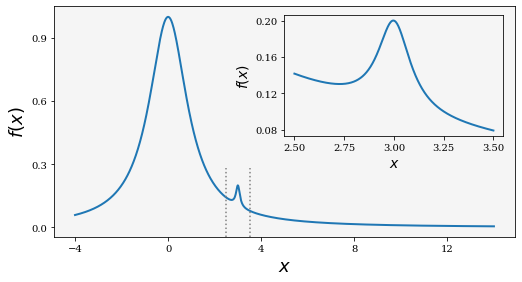

In [23]:
fig = plt.figure(figsize=(8, 4))

def f(x):
    return 1/(1 + x**2) + 0.1/(1 + ((3 - x)/0.1)**2)

def plot_and_format_axes(ax, x, f, fontsize):
    ax.plot(x, f(x), linewidth=2)
    ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(5))
    ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
    ax.set_xlabel(r"$x$", fontsize=fontsize)
    ax.set_ylabel(r"$f(x)$", fontsize=fontsize)
    
# main graph
ax = fig.add_axes([0.1, 0.15, 0.8, 0.8], facecolor="#f5f5f5")
x = np.linspace(-4, 14, 1000)
plot_and_format_axes(ax, x, f, 18)

# inset
x0, x1 = 2.5, 3.5
ax.axvline(x0, ymax=0.3, color="grey", linestyle=":")
ax.axvline(x1, ymax=0.3, color="grey", linestyle=":")

ax = fig.add_axes([0.5, 0.5, 0.38, 0.42], facecolor='none')
x = np.linspace(x0, x1, 1000)
plot_and_format_axes(ax, x, f, 14)

### subplots 子图布局

前面介绍过的`plt.subplots`函数返回的是一个元组，它包含一个Figure实例和一个包含Axes对象的NumPy数组。使用sharex和sharey参数，可以使子图之间使用相同的x轴和y轴。

默认情况下，该NumPy数组是压缩的，只要行数和列数有一个为1，返回的就是一维数组。行数和列数都为1，返回的就是一个单独的Axes实例。参数squeeze=False可以关闭这个特性。

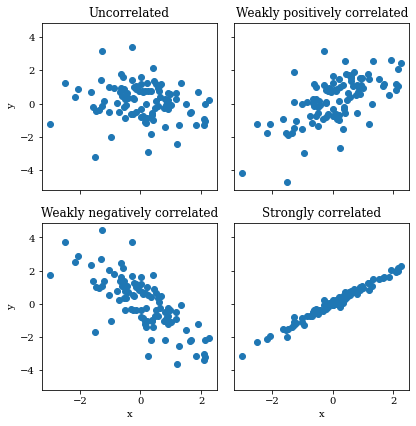

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(6, 6), sharex=True, sharey=True, squeeze=False)

x1 = np.random.randn(100)
x2 = np.random.randn(100)

axes[0, 0].set_title("Uncorrelated")
axes[0, 0].scatter(x1, x2)

axes[0, 1].set_title("Weakly positively correlated")
axes[0, 1].scatter(x1, x1 + x2)

axes[1, 0].set_title("Weakly negatively correlated")
axes[1, 0].scatter(x1, -x1 + x2)

axes[1, 1].set_title("Strongly correlated")
axes[1, 1].scatter(x1, x1 + 0.15 * x2)

axes[1, 1].set_xlabel("x")
axes[1, 0].set_xlabel("x")
axes[0, 0].set_ylabel("y")
axes[1, 0].set_ylabel("y")

plt.subplots_adjust(left=0.1, right=0.95, bottom=0.1, top=0.95, wspace=0.1, hspace=0.2)

### GridSpec 网格布局管理器

来自mpl.gridspec模块的GridSpec是matplotlib中最通用的网格布局管理器，可以创建子图宽和高不相等的网格。GridSpec对象仅用于设置网格布局，它本身不生产Axes对象。

创建GridSpec对象后，使用`Figure.add_subplot`方法创建Axes对象，并指明其画布位置。可以使用类似数组的索引从GridSpec对象中生成mpl.gridspec.SubplotSpec实例并作为参数传递给add_subplot。

[None, None, None, None, None, None, None, None, None, None]

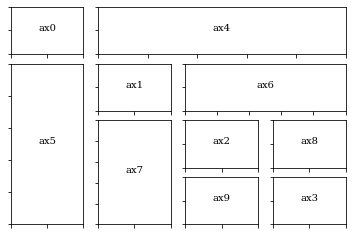

In [25]:
fig = plt.figure(figsize=(6, 4))

gs = mpl.gridspec.GridSpec(4, 4)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 1])
ax2 = fig.add_subplot(gs[2, 2])
ax3 = fig.add_subplot(gs[3, 3])

ax4 = fig.add_subplot(gs[0, 1:])
ax5 = fig.add_subplot(gs[1:, 0])

ax6 = fig.add_subplot(gs[1, 2:])
ax7 = fig.add_subplot(gs[2:, 1])

ax8 = fig.add_subplot(gs[2, 3])
ax9 = fig.add_subplot(gs[3, 2])


def clear_ticklabels(ax):
    ax.set_yticklabels([])
    ax.set_xticklabels([])

axes = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]
[ax.text(0.5, 0.5, "ax%d" % n, horizontalalignment='center') for n, ax in enumerate(axes)]
[clear_ticklabels(ax) for ax in axes]

## 绘制色图
---

目前未知，我们只考虑了单变量函数以及与之等价的$x-y$格式的二维数据图形。二维Axes图形也能用于对二元函数或$x-y-z$格式的三维数据进行可视化，使用的工具为色图或者热图。此时，Axes区域中的每个像素根据坐标系中对应点的z值进行着色。

使用pcolor生成色图时，需要以合适的格式准备数据。可以使用NumPy教程中介绍过的meshgrid函数生成所需的二维坐标数组。将所得的数组X和Y带入二元函数，通过NumPy数组计算得到数据数组Z。vmin和vmax参数用于设置映射到色轴的值的范围，这与使用`norm=mpl.colors.Normalize(vmin, vmax)`是等效的。

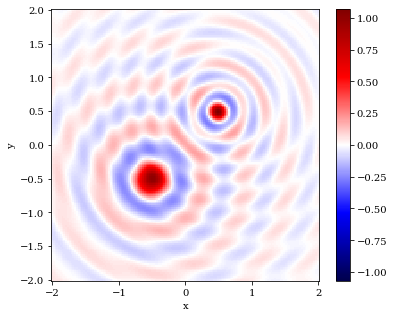

In [26]:
x = y = np.linspace(-2, 2, 150)
X, Y = np.meshgrid(x, y)

R1 = np.sqrt((X+0.5)**2 + (Y+0.5)**2)
R2 = np.sqrt((X+0.5)**2 + (Y-0.5)**2)
R3 = np.sqrt((X-0.5)**2 + (Y+0.5)**2)
R4 = np.sqrt((X-0.5)**2 + (Y-0.5)**2)

Z = np.sin(10 * R1) / (10 * R1) + np.sin(20 * R4) / (20 * R4)

fig, ax = plt.subplots(figsize=(6, 5))

p = ax.pcolor(X, Y, Z, cmap='seismic', vmin=-abs(Z).max(), vmax=abs(Z).max())
ax.axis('tight')
ax.set_xlabel('x')
ax.set_ylabel('y')
cb = fig.colorbar(p, ax=ax)  # 添加

与pcolor不同，inshow函数不需要使用坐标数据，同时会对z值进行自动插值处理，让整个图像变得更为平滑。

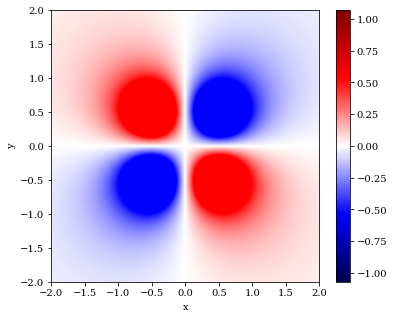

In [27]:
Z = 1/R1 - 1/R2 - 1/R3 + 1/R4

fig, ax = plt.subplots(figsize=(6, 5))

im = ax.imshow(Z, vmin=-1, vmax=1, cmap=mpl.cm.bwr,
               extent=[x.min(), x.max(), y.min(), y.max()])
im.set_interpolation('bilinear')

ax.axis('tight')
ax.set_xlabel('x')
ax.set_ylabel('y')
cb = fig.colorbar(p, ax=ax)

绘制二维等高线图可以使用contourf函数。与inshow函数类似，其同样会进行自动插值。contourf函数有额外的参数N用于设置需要绘制的等高线的数目。

Text(0, 0.5, 'y')

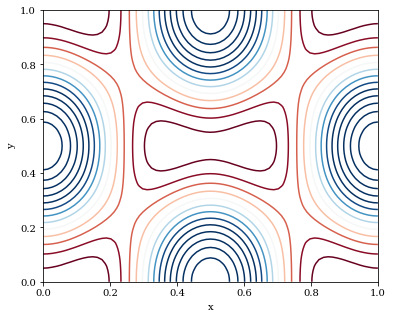

In [28]:
fig, ax = plt.subplots(figsize=(6, 5))

x = y = np.linspace(0, 1, 75)
X, Y = np.meshgrid(x, y)

Z = - 2 * np.cos(2 * np.pi * X) * np.cos(2 * np.pi * Y) - 0.7 * np.cos(np.pi - 4*np.pi*X)

c = ax.contour(X, Y, Z, 15, cmap=mpl.cm.RdBu, vmin=-1, vmax=1)

ax.axis('tight')
ax.set_xlabel('x')
ax.set_ylabel('y')

## 绘制3D图形
---

可视化三维数据的另外一种方式是使用3D图形。在matplotlib中，绘制3D图形需要使用mpl_toolkits.mplot3d.axes3d模块提供的Axes3D对象。

我们可以使用之前2D图形的所有Axes布局方法，只是需要以合适的方式设置projection参数。

创建Axes3D对象后，就可以使用Axes3D类提供的方法（plot_surface、plot_wireframe、contour等）在三维透视图中将数据绘制成曲面了。plot_surface函数使用rstride和cstride参数（行和列的步长）从输入数组中选择数据（避免数据点过密）。contour和contou函数使用可选参数zdir（可选值有'z'、'y'和'z'）和offset选择投影方向和指定显示投影的平面。


### 参考资料
[mplot3d手册](https://matplotlib.org/3.5.0/api/toolkits/mplot3d.html)

[mplot3d教程](https://matplotlib.org/3.5.0/tutorials/toolkits/mplot3d.html)

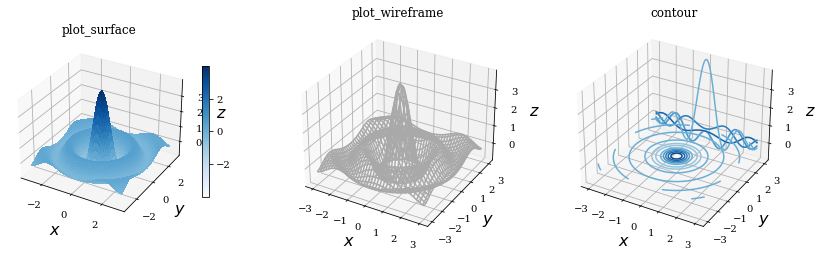

In [29]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
x = y = np.linspace(-3, 3, 74)
X, Y = np.meshgrid(x, y)

R = np.sqrt(X**2 + Y**2)
Z = np.sin(4 * R) / R

fig, axes = plt.subplots(1, 3, figsize=(14, 4), subplot_kw={'projection': '3d'})

def title_and_labels(ax, title):
    ax.set_title(title)
    ax.set_xlabel("$x$", fontsize=16)
    ax.set_ylabel("$y$", fontsize=16)
    ax.set_zlabel("$z$", fontsize=16)

norm = mpl.colors.Normalize(-abs(Z).max(), abs(Z).max())

p = axes[0].plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0, antialiased=False, norm=norm, cmap=mpl.cm.Blues)
cb = fig.colorbar(p, ax=axes[0], shrink=0.6)
title_and_labels(axes[0], "plot_surface")

p = axes[1].plot_wireframe(X, Y, Z, rstride=2, cstride=2, color="darkgrey")
title_and_labels(axes[1], "plot_wireframe")

cset = axes[2].contour(X, Y, Z, zdir='z', offset=0, norm=norm, cmap=mpl.cm.Blues)
cset = axes[2].contour(X, Y, Z, zdir='y', offset=3, norm=norm, cmap=mpl.cm.Blues)
title_and_labels(axes[2], "contour")

## 绘制交互式图表
---

<img src="https://matplotlib.org/stable/_images/inheritance-8d519fc9857d1b777f793d1708b942a4403cfde8.png" style="width: 50%;"/>

matplotlib.widget是matplotlib的GUI模块。借助该模块，我们可以添加各类交互式控件。

#### 参考资料
[matplotlib手册](https://matplotlib.org/stable/api/widgets_api.html)

`plt.plot`函数的返回值是一个list（即使只有1个元素），包含的元素为Line2D对象。使用`Line2D.set_ydata`方法对Axes图形中的数据进行修改后，使用`Figure.canvas.draw_idle`函数刷新画布，可以得到基于新数据的图形。

下面我们将使用`plt.plot`函数显示一个包含Slider和Button的交互式图形。

0

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
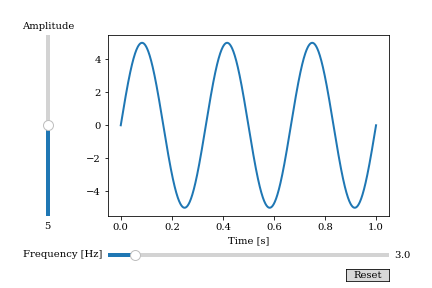

In [30]:
%matplotlib widget

from matplotlib import pyplot as plt
from matplotlib.widgets import Slider, Button
import numpy as np

# The parametrized function to be plotted
def f(t, amplitude, frequency):
    return amplitude * np.sin(2 * np.pi * frequency * t)

t = np.linspace(0, 1, 1000)

# Define initial parameters
init_amplitude = 5
init_frequency = 3

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots()
line, = plt.plot(t, f(t, init_amplitude, init_frequency), lw=2)
ax.set_xlabel('Time [s]')

# adjust the main plot to make room for the sliders
plt.subplots_adjust(left=0.25, bottom=0.25)

# Make a horizontal slider to control the frequency.
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03])
freq_slider = Slider(
    ax=axfreq,
    label='Frequency [Hz]',
    valmin=0.1,
    valmax=30,
    valinit=init_frequency,
)

# Make a vertically oriented slider to control the amplitude
axamp = plt.axes([0.1, 0.25, 0.0225, 0.63])
amp_slider = Slider(
    ax=axamp,
    label="Amplitude",
    valmin=0,
    valmax=10,
    valinit=init_amplitude,
    orientation="vertical"
)

# The function to be called anytime a slider's value changes
def update(val):
    line.set_ydata(f(t, amp_slider.val, freq_slider.val))
    fig.canvas.draw_idle()

# register the update function with each slider
freq_slider.on_changed(update)
amp_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')

def reset(event):
    freq_slider.reset()
    amp_slider.reset()
button.on_clicked(reset)

## Animation 动画
---

基于计时器对画布进行定时刷新可以得到动态数据。matplotlib中使用FuncAnimation函数生成动画，其工作原理大致如下：

```
for d in frames:  
   artists = func(d, *fargs)  
   fig.canvas.draw_idle()  
   fig.canvas.start_event_loop(interval)
```

#### 参考资料

[animation文档](https://matplotlib.org/stable/api/animation_api.html)

### 示例一

#### 1. 导入动画库并定义方程
我们的数据是一个0~2π内的正弦曲线：

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
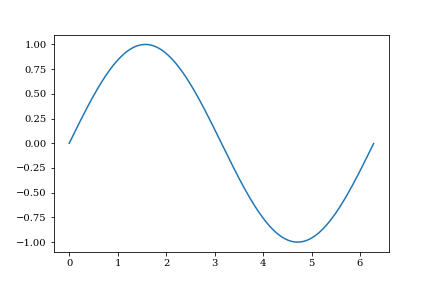

In [31]:
%matplotlib widget

from matplotlib import pyplot as plt
from matplotlib import animation
import numpy as np

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))

#### 2. 构造动画函数与帧函数：

接着，构造自定义动画函数animate，用来更新每一帧上各个x对应的y坐标值，参数表示第i帧；然后，构造开始帧函数init：

In [32]:
def animate(i):
    line.set_ydata(np.sin(x + i/10.0))
    return line,
def init():
    line.set_ydata(np.sin(x))
    return line,

#### 3. 参数设置：
接下来，我们调用FuncAnimation函数生成动画。参数说明

1. fig 进行动画绘制的figure
2. func 自定义动画函数，即传入刚定义的函数animate
3. frames 动画长度，一次循环包含的帧数
4. init_func 自定义开始帧，即传入刚定义的函数init
5. interval 更新频率，以ms计
6. lit 选择更新所有点，还是仅更新产生变化的点

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
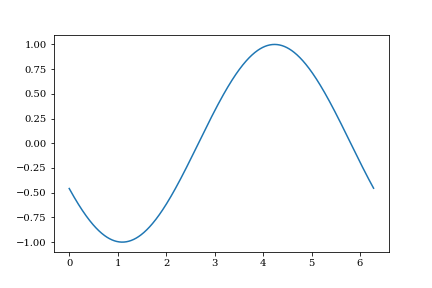

In [33]:
fig, ax = plt.subplots()
line, = ax.plot(x, np.sin(x))

ani = animation.FuncAnimation(fig=fig,
                              func=animate,
                              frames=100,
                              init_func=init,
                              interval=20,
                              blit=True)
#plt.show()
ani.save('movie.gif', writer='imagemagick', fps=20)

### 示例二

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
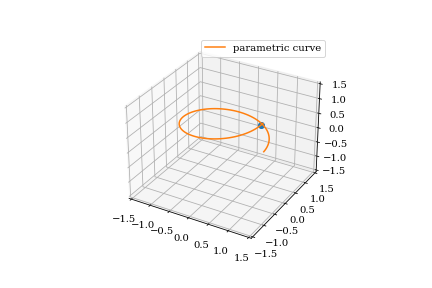

In [34]:
%matplotlib widget

from matplotlib import pyplot as plt
import numpy as np
from matplotlib import animation

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# create the parametric curve
t = np.arange(0, 2*np.pi, 2*np.pi/100)
x = np.cos(t)
y = np.sin(t)
z = t/(2.*np.pi)

# create the first plot
point, = ax.plot([x[0]], [y[0]], [z[0]], 'o')
line, = ax.plot(x, y, z, label='parametric curve')
ax.legend()
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-1.5, 1.5])

# second option - move the point position at every frame
def update_point(n, x, y, z, point):
    # NOTE: there is no .set_data() for 3 dim data...
    point.set_data([x[n]], [y[n]])
    point.set_3d_properties([z[n]])
    return point

ani = animation.FuncAnimation(fig, update_point, 99, fargs=(x, y, z, point))

#plt.show()
ani.save('movie2.gif', writer='imagemagick', fps=20)